In [1]:
import sys
import pandas as pd
sys.path.insert(0, '/10 A KAI 2/Week 4/Sales_Forcasting/') 

In [2]:
from Scripts.EDA import BASICEDA

In [1]:
import pandas as pd
df1 = pd.read_csv('../Data/store.csv')
df2 = pd.read_csv('../Data/train.csv')
df3 = pd.read_csv('../Data/test.csv')

C:\Users\marta\AppData\Local\Temp\ipykernel_2404\1652562602.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../Data/train.csv')


In [2]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
df3

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [5]:
EDA = BASICEDA(df2,df3,df1)

#####  Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

2024-09-22 19:42:46,361 - INFO - Checking the distribution of promotions in the training and test datasets...


Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


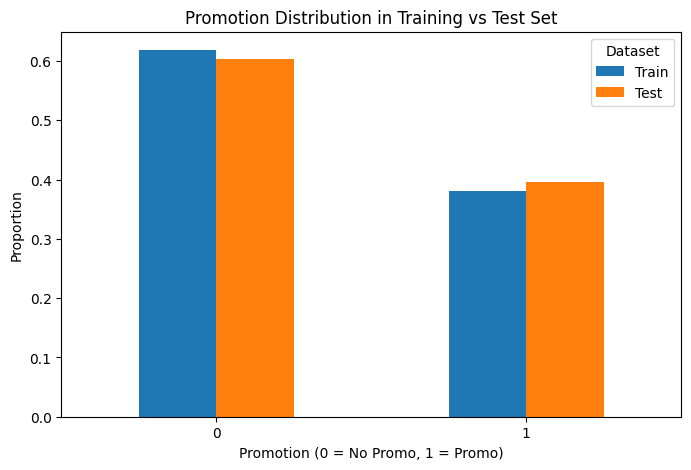

In [6]:
EDA.check_distribution_train_test_data()

#### In the test and train data the promotion value distribution is almost the same

##### Merge the train and store data

In [7]:
EDA.merge_store_data()

2024-09-22 19:42:48,796 - INFO - Merging training data with store data...
2024-09-22 19:42:49,051 - INFO - Merging completed. New training data shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:

EDA.df_basic_info()

2024-09-20 15:09:44,285 - INFO - Describing the training data...


,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [9]:
df2['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [10]:
EDA.missing_percentage()

,Column,Missing Percentage
Promo2SinceWeek,Promo2SinceWeek,49.943620
PromoInterval,PromoInterval,49.943620
Promo2SinceYear,Promo2SinceYear,49.943620
CompetitionOpenSinceYear,CompetitionOpenSinceYear,31.787764
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,31.787764
CompetitionDistance,CompetitionDistance,0.259730
DayOfWeek,DayOfWeek,0.000000
Store,Store,0.000000
Date,Date,0.000000
Sales,Sales,0.000000


In [11]:
EDA.data_types()

,Column,Data Type
StoreType,StoreType,object
StateHoliday,StateHoliday,object
Assortment,Assortment,object
PromoInterval,PromoInterval,object
Date,Date,object
CompetitionDistance,CompetitionDistance,float64
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,CompetitionOpenSinceYear,float64
Promo2SinceWeek,Promo2SinceWeek,float64
Promo2SinceYear,Promo2SinceYear,float64


In [12]:
EDA.outlier_check_perc()

,Column,Outlier Percentage
SchoolHoliday,SchoolHoliday,17.864667
Open,Open,16.989331
CompetitionDistance,CompetitionDistance,9.773628
Customers,Customers,3.745051
Sales,Sales,2.624239
CompetitionOpenSinceYear,CompetitionOpenSinceYear,1.440346
Store,Store,0.000000
DayOfWeek,DayOfWeek,0.000000
Promo,Promo,0.000000
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,0.000000


2024-09-20 20:28:39,583 - INFO - Analyzing sales data for holiday effects...


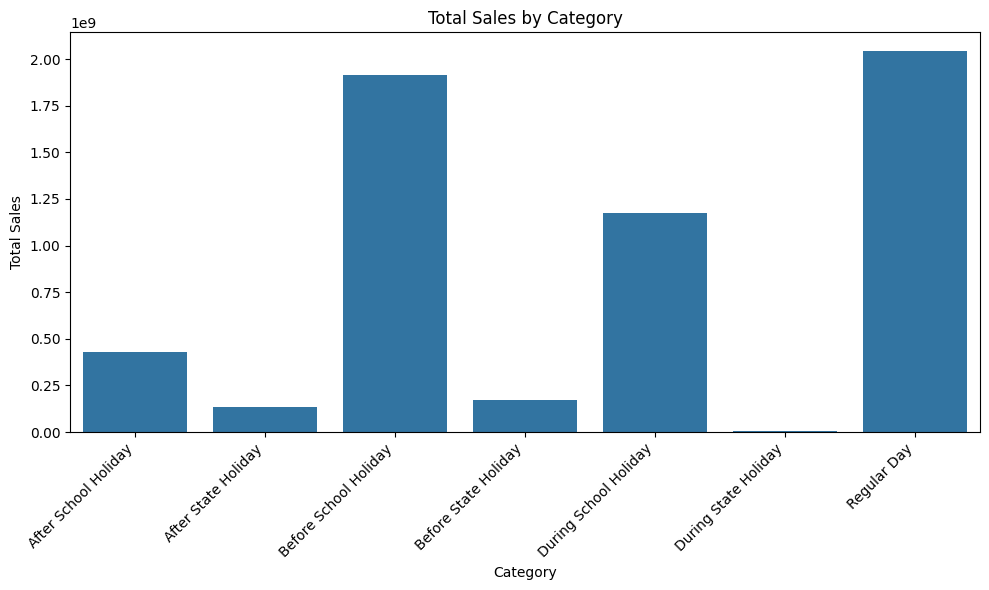

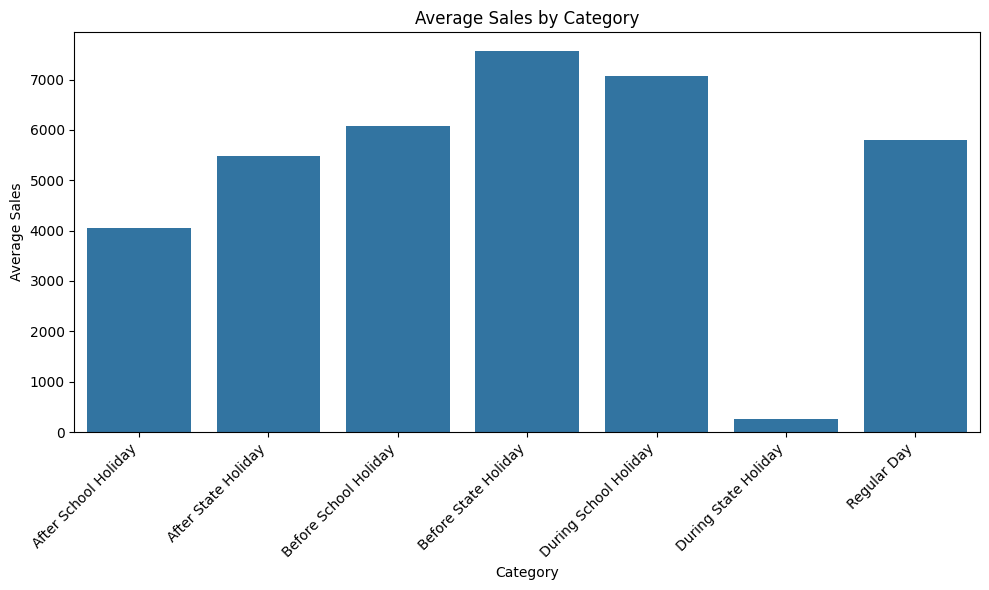

,Category,Total_Sales,Average_Sales,Total_Customers,Average_Customers
0,After School Holiday,431639442,4049.606353,45964102,431.231489
1,After State Holiday,132076687,5481.952725,14515773,602.489229
2,Before School Holiday,1912716651,6084.904310,212329614,675.481851
3,Before State Holiday,173383219,7561.413825,18694410,815.281727
4,During School Holiday,1174123243,7064.095079,127540328,767.344492
5,During State Holiday,8015855,258.159581,1243760,40.056683
6,Regular Day,2041225526,5798.936153,223753768,635.664114


In [9]:
EDA.analyze_sales_holidays()

2024-09-20 14:27:52,780 - INFO - Analyzing seasonal purchase trends...


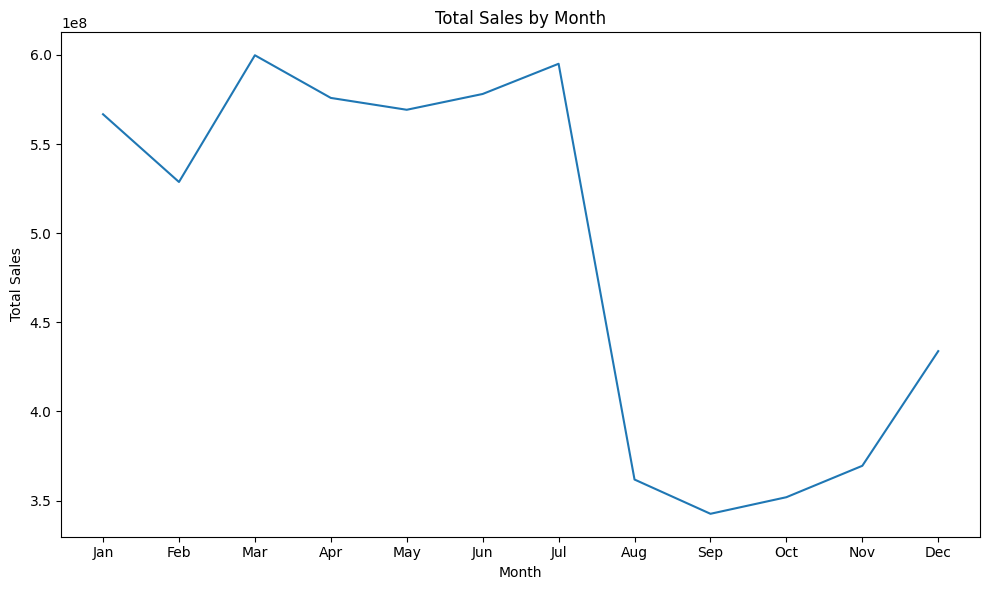

,Month,Total_Sales,Average_Sales,Total_Customers,Average_Customers
0,1,566728724,5465.395529,62384091,601.617172
1,2,528734410,5645.253150,58698139,626.715129
2,3,599831906,5784.578871,65265836,629.401958
3,4,575895295,5738.866916,63282009,630.612945
4,5,569248217,5489.639973,62423484,601.991263
5,6,578112775,5760.964375,62698087,624.794091
6,7,595059205,6064.915711,64425231,656.629781
7,8,361791202,5693.016554,40830683,642.496979
8,9,342570131,5570.246033,39017980,634.438699
9,10,351878728,5537.037419,40106150,631.095987


In [14]:
EDA.seasonal_purchase_treand_ana()

2024-09-20 20:45:00,133 - INFO - Analyzing customer sales correlations...


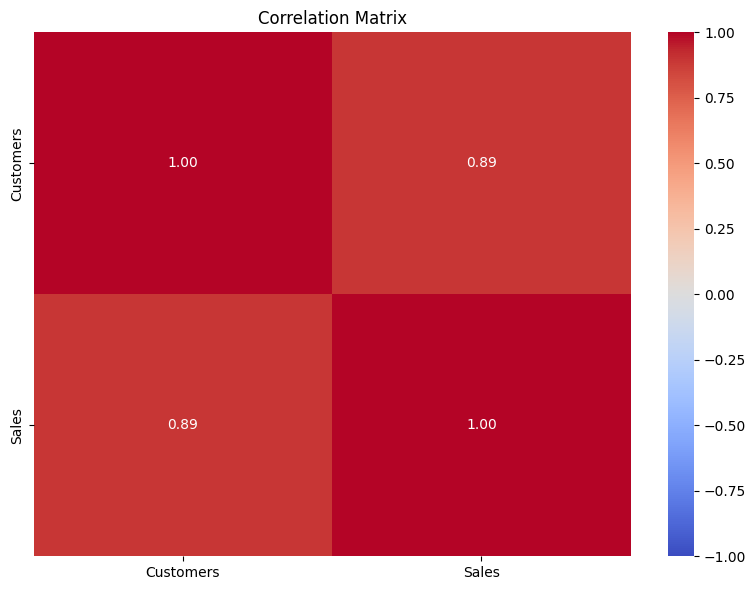

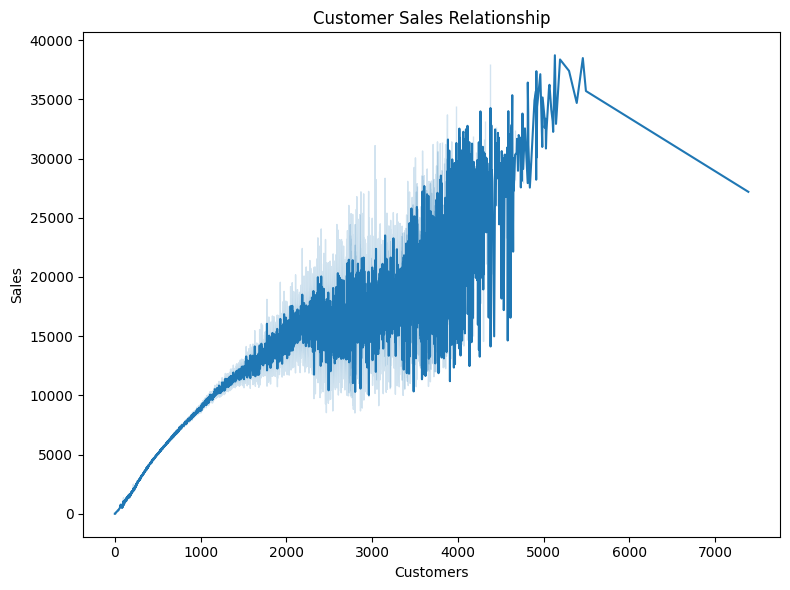

In [9]:
EDA.corr_customer_sales()

2024-09-20 21:09:15,327 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:09:15,327 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Average Sales by Promotion Status:
   Promo        Sales
0      0  4406.050805
1      1  7991.152046

Average Customers by Promotion Status:
   Promo   Customers
0      0  517.823542
1      1  820.098815


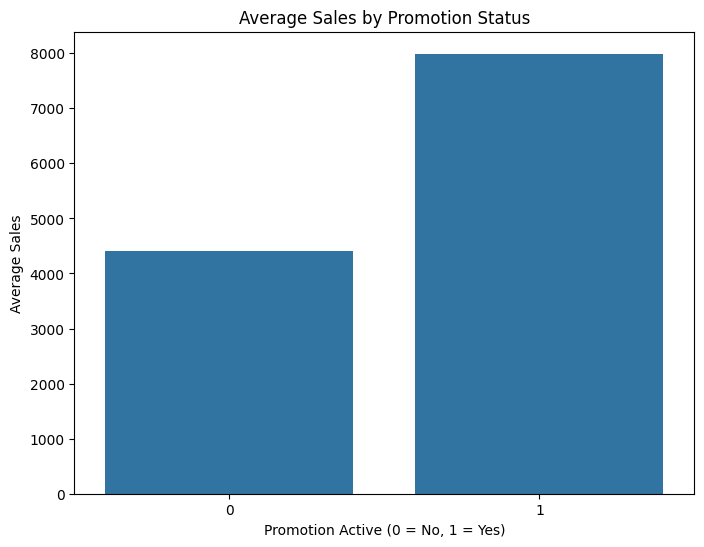

2024-09-20 21:09:15,477 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:09:15,504 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


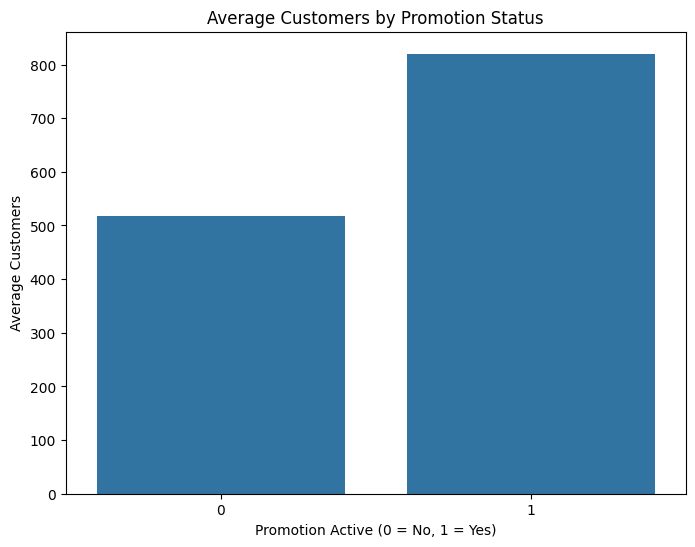

T-test for Sales: t-statistic = 511.54718673163774, p-value = 0.0
T-test for Customers: t-statistic = 336.12008294988004, p-value = 0.0


In [9]:
EDA.analyze_promotions()

### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

2024-09-20 14:27:58,145 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 14:27:58,154 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


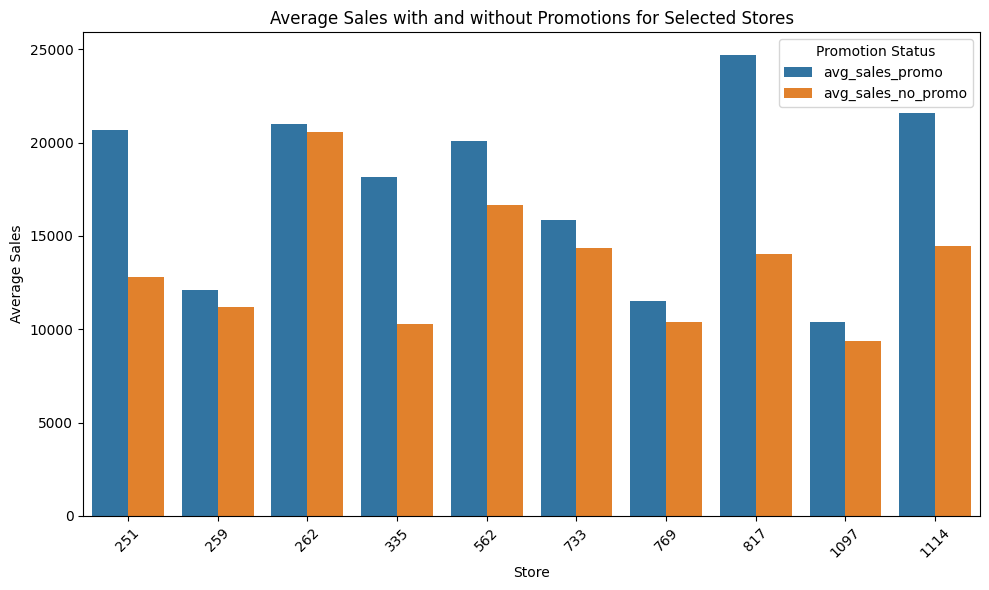

In [17]:
EDA.analyze_and_plot_promotions()

#### Trends of customer behavior during store opening and closing times


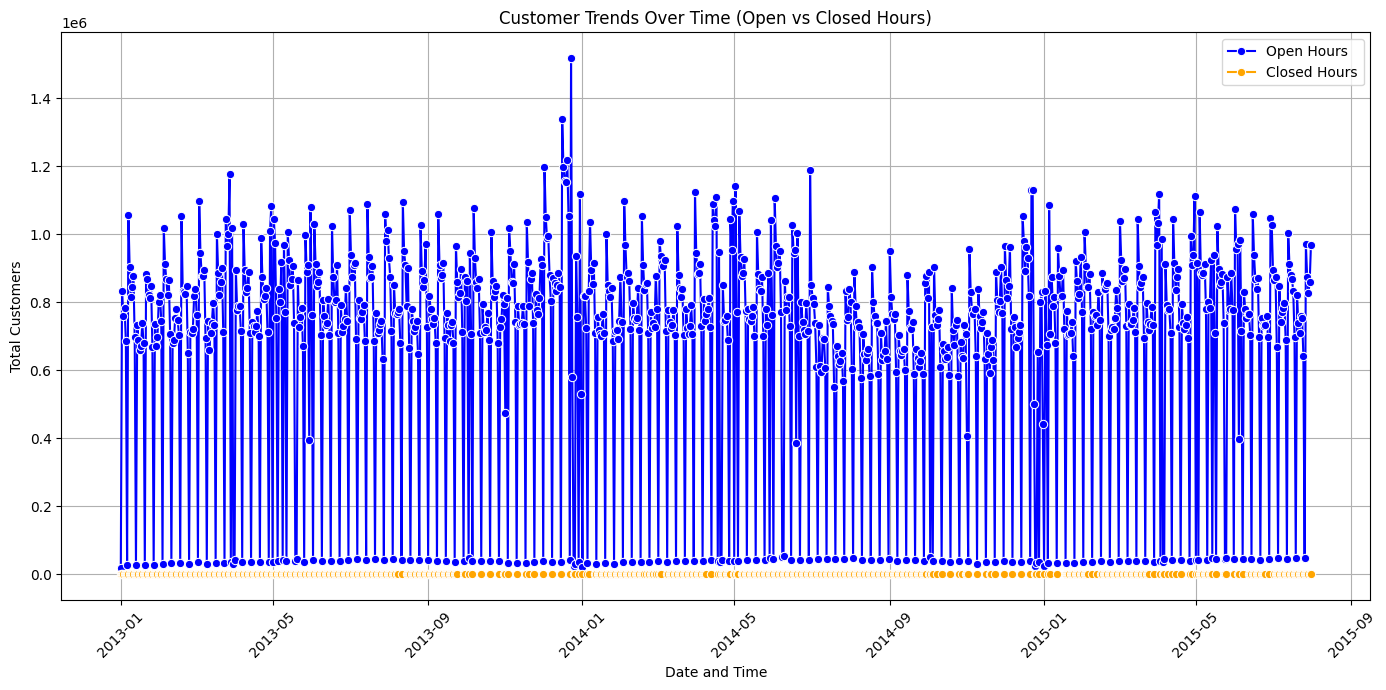

In [9]:
EDA.analyze_customer_behavior()

d:\10 A KAI 2/Week 4/Sales_Forcasting\Scripts\EDA.py:389: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(store_counts.keys()), y=list(store_counts.values()), palette="coolwarm")


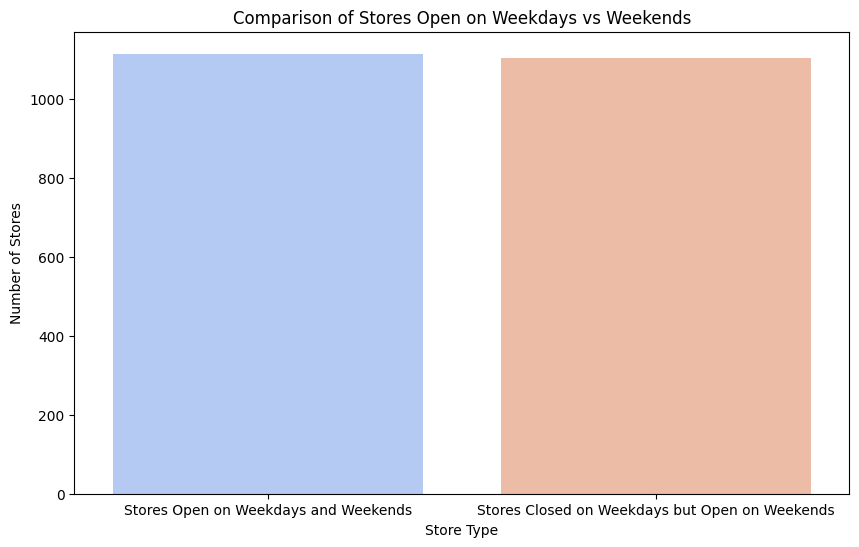

(array([  85,  122,  209, ..., 1115,  876,  292]),
 array([ 122,  209,  259, ..., 1115,  876,  292]))

In [9]:
EDA.analyze_weekday_weekend_sales()

  Assortment       Sales
0          a  2945750070
1          b    70946312
2          c  2856484241


d:\10 A KAI 2/Week 4/Sales_Forcasting\Scripts\EDA.py:400: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_assortment, x='Assortment', y='Sales', palette='viridis')


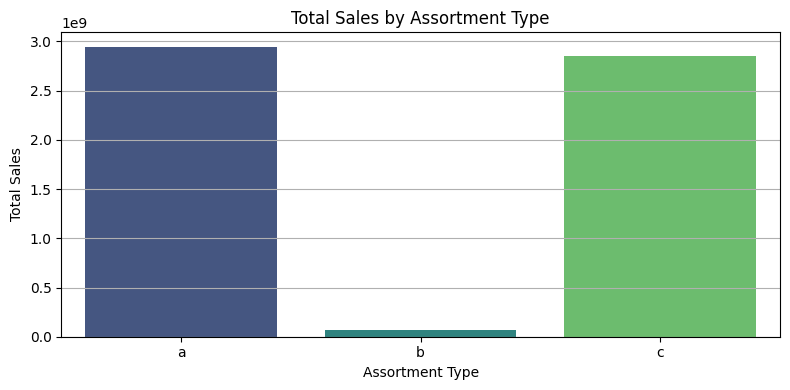

In [10]:
EDA.analyze_assortment_type_effect()

In [11]:
EDA.analyze_competition_factors()

AttributeError: 'BASICEDA' object has no attribute 'analyze_competition_factors'

Empty DataFrame
Columns: [Store, Sales_before, Sales_after]
Index: []


d:\10 A KAI 2/Week 4/Sales_Forcasting\Scripts\EDA.py:517: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sales Period')


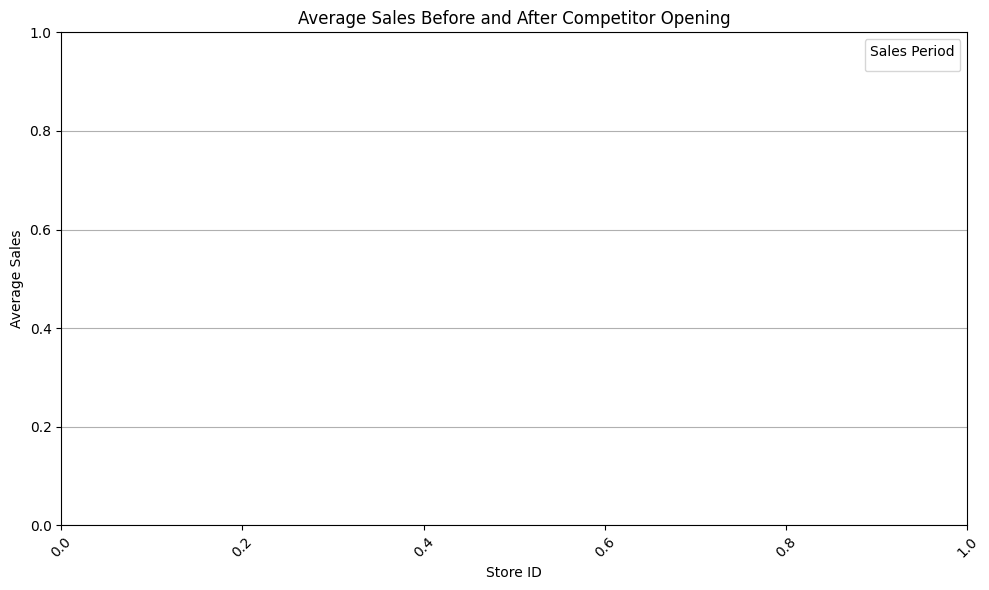

T-test: t-statistic = nan, p-value = nan


d:\10 A KAI 2/Week 4/Sales_Forcasting\Scripts\EDA.py:523: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_rel(sales_summary['Sales_before'], sales_summary['Sales_after'])


In [10]:
EDA.analyze_weekday_open_stores()

In [13]:
data = pd.read_csv('../Data/mergedData.csv')

In [14]:
data

,Unnamed: 0,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [15]:
# Identify stores that are open every weekday (1-5)
weekday_stores = data[(data['DayOfWeek'] >= 1) & (data['DayOfWeek'] <= 5) & (data['Open'] == 1)]
        

In [16]:
weekday_stores

,Unnamed: 0,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1017201,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-08,5243,341,1,1,0,1
1017202,1017202,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,1,0,1
1017205,1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1


Correlation between Sales and Competition Distance: -0.02


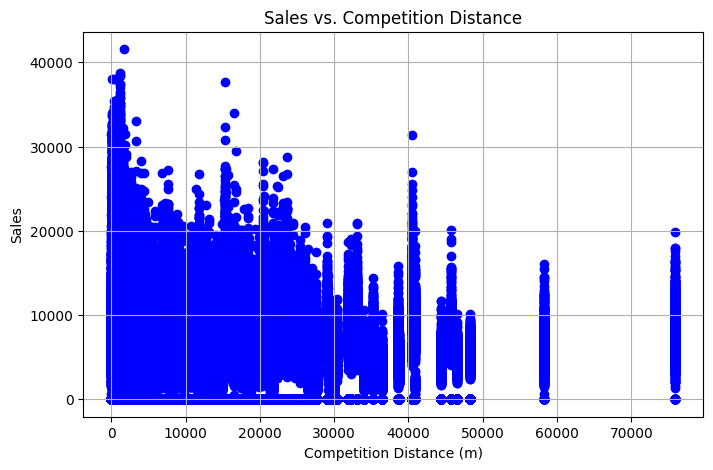

In [9]:
EDA.analyze_competition_impact()